In [19]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import numpy.random as rand
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import accuracy_score, f1_score
from datetime import datetime
import glob
import numpy as np
import os.path as path
from scipy import misc
import imageio

# Logistic Regression #

I cultured two types of cells: ReN G10 cells and ReN G2 cells. Both are human neural stem cells, and they differ primarily in the intensity of their GFP signals.

I reorganized my data quite a lot in order to conduct logistic regression. The csv files that I created had two columns: one with the quantity of mitophagy in each well of cells that I cultured, and the other stating whether the well was infected or not infected.

In [3]:
v_g10 = np.array(pd.read_csv('logistic regression g10.csv'))

(0, 20000)

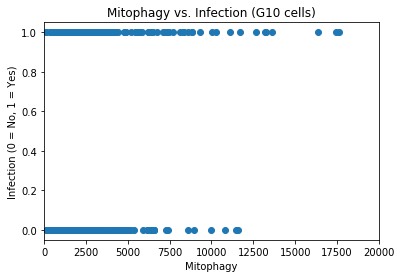

In [4]:
plt.plot(v_g10[:,0], v_g10[:,1], 'o')
plt.ylabel("Infection (0 = No, 1 = Yes)")
plt.xlabel("Mitophagy")
plt.title("Mitophagy vs. Infection (G10 cells)")
plt.xlim(0, 20000)

In [5]:
v_g2 = np.array(pd.read_csv('logistic regression g2.csv'))

(0, 7500)

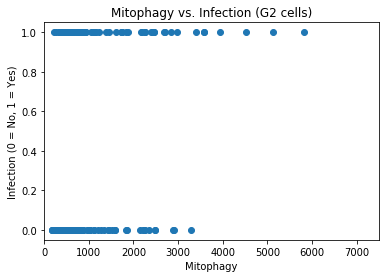

In [6]:
plt.plot(v_g2[:,0], v_g2[:,1], 'o')
plt.ylabel("Infection (0 = No, 1 = Yes)")
plt.xlabel("Mitophagy")
plt.title("Mitophagy vs. Infection (G2 cells)")
plt.xlim(0, 7500)

In [7]:
# Plot a sigmoid curve

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [8]:
# Perform linear regression on G2 cells

clf_g2 = linear_model.LogisticRegression(C=1e5)
clf_g2.fit(v_g2[:,0].reshape(-1,1), v_g2[:,1].reshape(len(v_g2[:,1],)))

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Text(0,0.5,'Probability of Infection')

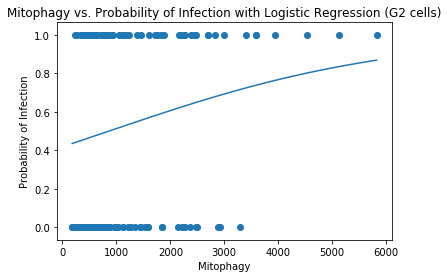

In [9]:
# Plot logistic regression on G2 cells

x_range = np.linspace(np.min(v_g2[:,0]),np.max(v_g2[:,0]),1000)
loss = sigmoid(x_range*clf_g2.coef_ + clf_g2.intercept_).ravel()
plt.scatter(v_g2[:,0], v_g2[:,1])
plt.plot(x_range, loss)
plt.title("Mitophagy vs. Probability of Infection with Logistic Regression (G2 cells)")
plt.xlabel("Mitophagy")
plt.ylabel("Probability of Infection")

In [10]:
# Remove outliers from G10 data set

v4 = np.delete(v_g10, np.argmax(v_g10[:,0]), axis=0)
v5 = np.delete(v4, np.argmax(v4[:,0]), axis=0)

In [11]:
# Perform logistic regression on G10 cells

clf_g10 = linear_model.LogisticRegression(C=1e5)
clf_g10.fit(v4[:,0].reshape(-1,1), v4[:,1].reshape(len(v4[:,1],)))

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Text(0,0.5,'Probability of Infection')

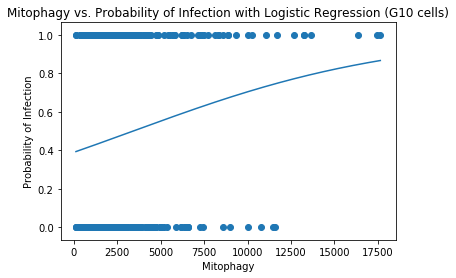

In [12]:
# Plot logistic regression on G10 cells

x_range = np.linspace(np.min(v5[:,0]),np.max(v5[:,0]),1000)
loss = sigmoid(x_range*clf_g10.coef_ + clf_g10.intercept_).ravel()
plt.scatter(v5[:,0], v5[:,1])
plt.plot(x_range, loss)
plt.title("Mitophagy vs. Probability of Infection with Logistic Regression (G10 cells)")
plt.xlabel("Mitophagy")
plt.ylabel("Probability of Infection")

# SVM #

In [13]:
# X_g2 has two columns: one with ABeta concentration, and another with quantity of mitophagy
# y_lg2 has one column, which states whether a well of cells was infected or not infected

X_g2 = np.array(pd.read_csv('SVM G2.csv'))
y_lg2 = np.array(pd.read_csv('SVM G2 infection.csv'))

In [14]:
# Flatten y_lg2, which is currently a list of lists in which each list consists of only one number

y_g2 = []
for sublist in y_lg2.tolist():
    for item in sublist:
        y_g2.append(item)
y_g2 = np.array(y_g2)

Text(0.5,1,'Amyloid Beta Concentration vs. Mitophagy')

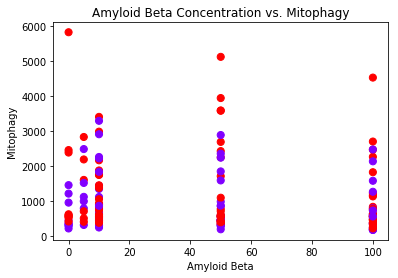

In [15]:
plt.scatter(X_g2[:, 0], X_g2[:, 1], c=y_g2, s=50, cmap='rainbow')
plt.xlabel('Amyloid Beta')
plt.ylabel('Mitophagy')
plt.title('Amyloid Beta Concentration vs. Mitophagy')

In [16]:
# Perform SVM on G2 data

from sklearn.svm import SVC # "Support vector classifier"
model_g2 = SVC(C=1e10)
model_g2.fit(X_g2, y_g2)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
# Function for plotting SVM, taken from https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


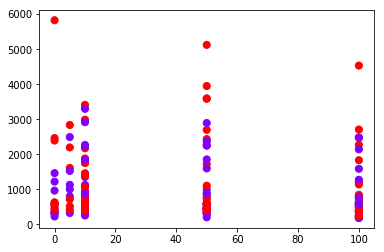

In [18]:
plt.scatter(X_g2[:, 0], X_g2[:, 1], c=y_g2, s=50, cmap='rainbow')
plot_svc_decision_function(model_g2)

No contour levels were found for the G2 data, meaning that SVM was unsuccessful.

In [19]:
# Upload the G10 data

X_g10 = np.array(pd.read_csv('SVM G10.csv'))
y_lg10 = np.array(pd.read_csv('SVM G10 infection.csv'))

In [20]:
# Flatten y_lg10

y_g10 = []
for sublist in y_lg10.tolist():
    for item in sublist:
        y_g10.append(item)
y_g10 = np.array(y_g10)

Text(0.5,1,'Amyloid Beta Concentration vs. Mitophagy')

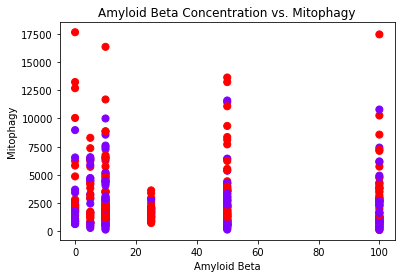

In [23]:
plt.scatter(X2_g10[:, 0], X2_g10[:, 1], c=y2_g10, s=50, cmap='rainbow')
plt.xlabel('Amyloid Beta')
plt.ylabel('Mitophagy')
plt.title('Amyloid Beta Concentration vs. Mitophagy')

In [30]:
# Perform SVM on G10 data

from sklearn.svm import SVC # "Support vector classifier"
model_g10 = SVC(C=1e10)
model_g10.fit(X_g10, y_g10)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


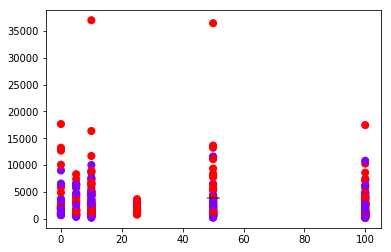

In [31]:
plt.scatter(X_g10[:, 0], X_g10[:, 1], c=y_g10, s=50, cmap='rainbow')
plot_svc_decision_function(model_g10)

SVM also fails on the G10 data. Let's see what happens when we remove the outliers.

In [32]:
# Remove outliers from the X_g10 data set

X1_g10 = np.delete(X_g10, np.argmax(X_g10[:,1]), axis=0)
X2_g10 = np.delete(X1_g10, np.argmax(X1_g10[:,1]), axis=0)

In [33]:
# Remove corresponding outliers from y_g10 data

y1_g10 = np.delete(y_g10, np.argmax(X_g10[:,1]))
y2_g10 = np.delete(y1_g10, np.argmax(X1_g10[:,1]))

In [34]:
# Perform SVM on G10 data

from sklearn.svm import SVC # "Support vector classifier"
model_g10 = SVC(C=1e10)
model_g10.fit(X2_g10, y2_g10)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

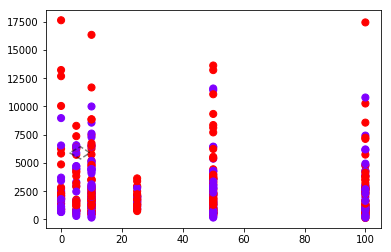

In [35]:
plt.scatter(X2_g10[:, 0], X2_g10[:, 1], c=y2_g10, s=50, cmap='rainbow')
plot_svc_decision_function(model_g10)

SVM does plot contours this time, but they don't divide the data meaningfully. Thus, SVM also fails even when we remove the outliers.

# K-Means Clustering #

In [46]:
# Perform K-Means clustering on G2 data

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_g2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

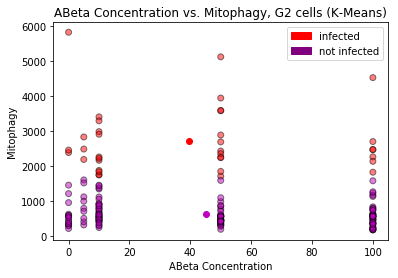

In [57]:
# Plot K-Means clustering on G2 data 

import matplotlib.patches as mpatches

labels = kmeans.predict(X_g2)
centroids = kmeans.cluster_centers_

colmap = {1: 'm', 2: 'r'}

colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(X_g2[:,0], X_g2[:,1], color=colors, alpha=0.5, edgecolor='k')
plt.xlabel("ABeta Concentration")
plt.ylabel("Mitophagy")
plt.title("ABeta Concentration vs. Mitophagy, G2 cells (K-Means)")
red_patch = mpatches.Patch(color='red', label='infected')
purple_patch = mpatches.Patch(color='purple', label='not infected')
plt.legend(handles=[red_patch, purple_patch])
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.show()

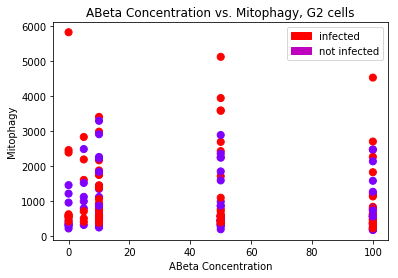

In [60]:
# Compare with actual G2 data

plt.scatter(X_g2[:, 0], X_g2[:, 1], c=y_g2, s=50, cmap='rainbow')
plt.xlabel("ABeta Concentration")
plt.ylabel("Mitophagy")
plt.title("ABeta Concentration vs. Mitophagy, G2 cells")
red_patch = mpatches.Patch(color='red', label='infected')
purple_patch = mpatches.Patch(color='m', label='not infected')
plt.legend(handles=[red_patch, purple_patch])

In [42]:
# Perform K-Means clustering on G10 data

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X2_g10)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

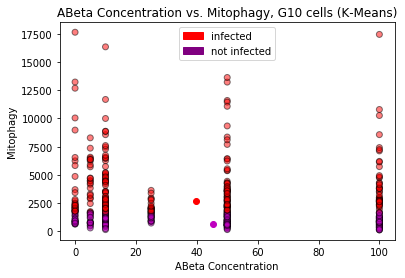

In [62]:
# Plot K-Means clustering on G10 data 

labels = kmeans.predict(X2_g10)
centroids = kmeans.cluster_centers_

colmap = {1: 'm', 2: 'r'}

colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(X2_g10[:,0], X2_g10[:,1], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
red_patch = mpatches.Patch(color='red', label='infected')
purple_patch = mpatches.Patch(color='purple', label='not infected')
plt.legend(handles=[red_patch, purple_patch])
plt.xlabel("ABeta Concentration")
plt.ylabel("Mitophagy")
plt.title("ABeta Concentration vs. Mitophagy, G10 cells (K-Means)")
plt.show()

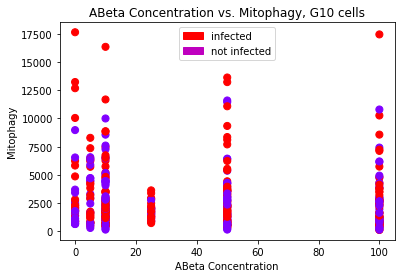

In [63]:
# Compare with actual G10 data

plt.scatter(X2_g10[:, 0], X2_g10[:, 1], c=y2_g10, s=50, cmap='rainbow')
plt.xlabel("ABeta Concentration")
plt.ylabel("Mitophagy")
plt.title("ABeta Concentration vs. Mitophagy, G10 cells")
red_patch = mpatches.Patch(color='red', label='infected')
purple_patch = mpatches.Patch(color='m', label='not infected')
plt.legend(handles=[red_patch, purple_patch])

# CNN (Convolutional Neural Network) #

In [7]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
import glob
import numpy as np
import os.path as path
from scipy import misc
import imageio

In [13]:
# Import images, which have been renamed in advance such that all "infected" images have a filename
# that starts with 1 and all "non-infected" images have a filename that starts with 0.
# Code below is mostly adapted from https://medium.com/@kylepob61392/airplane-image-classification-using-a-keras-cnn-22be506fdb53

IMAGE_PATH = '/Users/kshinozuka/Documents/Harvard/Classes/S19/MCB111/Project/CNN_new/'
file_paths = glob.glob(path.join(IMAGE_PATH, '*.tif'))
images = [misc.imread(path) for path in file_paths]
images = np.asarray(images)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [14]:
image_size = np.asarray([images.shape[0], images.shape[1], images.shape[2]])
images = images / 255

In [15]:
# Read the labels from the filenames
n_images = images.shape[0]
labels = np.zeros(n_images)
for i in range(n_images):
    filename = path.basename(file_paths[i])[0]
    labels[i] = int(filename[0])

In [16]:
# Split into test and training sets
TRAIN_TEST_SPLIT = 0.9

# Split at the given index
split_index = int(TRAIN_TEST_SPLIT * n_images)
shuffled_indices = np.random.permutation(n_images)
train_indices = shuffled_indices[0:split_index]
test_indices = shuffled_indices[split_index:]

# Split the images and the labels
x_train = images[train_indices, :, :]
y_train = labels[train_indices]
x_test = images[test_indices, :, :]
y_test = labels[test_indices]

In [17]:
def visualize_data(positive_images, negative_images):
    # INPUTS
    # positive_images - Images where the label = 1 (True)
    # negative_images - Images where the label = 0 (False)

    figure = plt.figure(figsize=(20,8))
    count = 0
    for i in range(positive_images.shape[0]):
        count += 1
        figure.add_subplot(2, positive_images.shape[0], count)
        plt.imshow(positive_images[i, :, :])
        plt.axis('off')
        plt.title("1")

        figure.add_subplot(1, negative_images.shape[0], count)
        plt.imshow(negative_images[i, :, :])
        plt.axis('off')
        plt.title("0")
    plt.show()

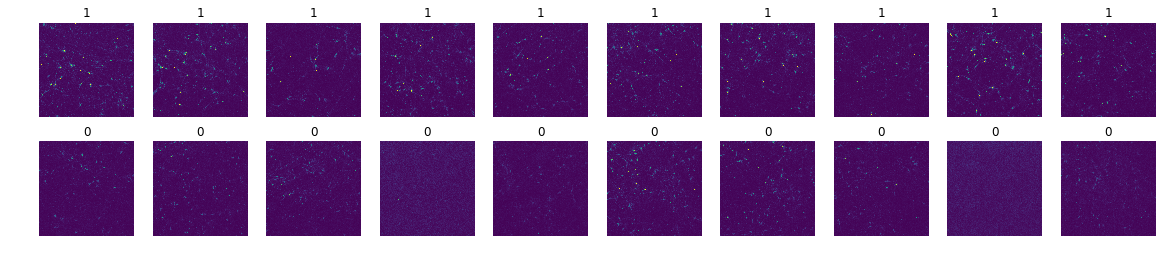

In [21]:
# Number of positive and negative examples to show
N_TO_VISUALIZE = 10

# Select the first N positive examples
positive_example_indices = (y_train == 1)
positive_examples = x_train[positive_example_indices, :, :]
positive_examples = positive_examples[15:25, :, :]

# Select the first N negative examples
negative_example_indices = (y_train == 0)
negative_examples = x_train[negative_example_indices, :, :]
negative_examples = negative_examples[15:25, :, :]

# Call the visualization function
visualize_data(positive_examples, negative_examples)

In [22]:
N_LAYERS = 4
def cnn(size, n_layers):
    # INPUTS
    # size     - size of the input images
    # n_layers - number of layers
    # OUTPUTS
    # model    - compiled CNN

    # Define hyperparamters
    MIN_NEURONS = 20
    MAX_NEURONS = 120
    KERNEL = (3, 3)

    # Determine the # of neurons in each convolutional layer
    steps = np.floor(MAX_NEURONS / (n_layers + 1))
    nuerons = np.arange(MIN_NEURONS, MAX_NEURONS, steps)
    nuerons = nuerons.astype(np.int32)

    # Define a model
    model = Sequential()
    
    from tensorflow.keras.layers import InputLayer, Reshape
    model.add(InputLayer(input_shape=(1024, 1024)))
    model.add(Reshape((1024, 1024, 1)))

    # Add convolutional layers
    for i in range(0, n_layers):
        model.add(Conv2D(nuerons[i], KERNEL))

        model.add(Activation('relu'))

    # Add max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(MAX_NEURONS))
    model.add(Activation('relu'))

    # Add output layer
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # Print a summary of the model
    model.summary()

    return model

In [ ]:
model = cnn(size=image_size, n_layers=N_LAYERS)

In [12]:
EPOCHS = 20
BATCH_SIZE = 10
PATIENCE = 5
early_stopping = EarlyStopping(monitor='loss', min_delta=0, patience=PATIENCE, verbose=0, mode='auto')

In [13]:
LOG_DIRECTORY_ROOT = ''
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
log_dir = "{}run-{}/".format(LOG_DIRECTORY_ROOT, now)
tensorboard = TensorBoard(log_dir=log_dir, write_graph=True, write_images=True)

In [14]:
callbacks = [early_stopping, tensorboard]

In [ ]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

In [ ]:
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks, verbose=0)

In [ ]:
# Make a prediction on the test set
test_predictions = model.predict(x_test)
test_predictions = np.round(test_predictions)

# Report the accuracy
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy: " + str(accuracy))

def visualize_incorrect_labels(x_data, y_real, y_predicted):
    # INPUTS
    # x_data      - images
    # y_data      - ground truth labels
    # y_predicted - predicted label
    count = 0
    figure = plt.figure()
    incorrect_label_indices = (y_real != y_predicted)
    y_real = y_real[incorrect_label_indices]
    y_predicted = y_predicted[incorrect_label_indices]
    x_data = x_data[incorrect_label_indices, :, :, :]

    maximum_square = np.ceil(np.sqrt(x_data.shape[0]))

    for i in range(x_data.shape[0]):
        count += 1
        figure.add_subplot(maximum_square, maximum_square, count)
        plt.imshow(x_data[i, :, :, :])
        plt.axis('off')
        plt.title("Predicted: " + str(int(y_predicted[i])) + ", Real: " + str(int(y_real[i])), fontsize=10)

    plt.show()

visualize_incorrect_labels(x_test, y_test, np.asarray(test_predictions).ravel())

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# applying transformation to image
train_datagen = ImageDataGenerator(
 rescale=1./255,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
training_set = train_datagen.flow_from_directory(
        '/Users/kshinozuka/Documents/Harvard/Classes/S19/MCB111/Project/CNN_new/training/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        '/Users/kshinozuka/Documents/Harvard/Classes/S19/MCB111/Project/CNN_new/test/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [12]:
from IPython.display import display

from tensorflow.keras.models import Sequential
classifier = Sequential()

from tensorflow.keras.layers import Conv2D
classifier.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), input_shape=(64,64,3), activation='relu'))

from tensorflow.keras.layers import MaxPooling2D
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

from tensorflow.keras.layers import Flatten
classifier.add(Flatten())
               
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=1, activation='sigmoid'))
               
classifier.compile( optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

from IPython.display import display 
               
classifier.fit_generator(
        training_set,
        steps_per_epoch=10,
        epochs=5,
        validation_data=test_set, validation_steps=5)

Epoch 1/5


KeyboardInterrupt: 